In [15]:
import sys
sys.path.append('/home/chris/repos/financial_analysis/')
import pandas as pd

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
from credentials import *

In [61]:
import requests
import json
import pprint

url = "https://www.alphavantage.co/query"
outFile = '../newfile.csv'
function = "TIME_SERIES_DAILY"
symbol = "^GSPC"
api_key = key

data = { "function": function, 
         "symbol": symbol, 
         "apikey": api_key,
         "outputsize": 'compact',
         "datatype": 'csv'} 
page = requests.get(url, params = data)
#pprint.pprint(page.json())

with open(outFile, 'w') as oF:
    oF.write(page.text)

In [62]:
dax = 'DAX'
df = pd.read_csv('../newfile.csv',usecols=["timestamp", "close"]).rename(columns={'close' : 'close_'+dax})

In [63]:
df.head(n=5)

,timestamp,close_DAX
0,2018-03-06,2728.1201
1,2018-03-05,2720.9399
2,2018-03-02,2691.2500
3,2018-03-01,2677.6699
4,2018-02-28,2713.8301


In [64]:
df.loc[(df==0).any(axis=1)].index

Int64Index([], dtype='int64')

In [65]:
df = df.drop(df.loc[(df==0).any(axis=1)].index)

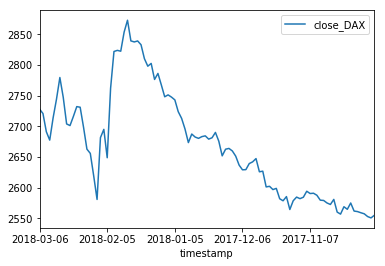

In [66]:
df.plot(x='timestamp',y='close_DAX')

In [74]:
indices = [
    '^GSPC', #S&P 500
    '^DJI',  #DowJones 30
    '^IXIC', #NASDAQ
    '^NYA', #NYSE COMPOSITE (DJ)
    '^XAX',  #NYSE AMEX COMPOSITE INDEX
    '^BATSK',#BATS 1000 Index
    '^RUT',  #Russell 2000
    '^VIX',  #Vix
    '^FTSE', #FTSE 100
    '^GDAXI',#DAX
    '^FCHI', #CAC 40
    '^STOXX50E', #STOXX 50
    '^N100', #EURONEXT 100
    '^BFX',  #BEL 20 Brussels
    '^N225', #Nikkei
    '^HSI'  #Hangseng
    
    
]

In [69]:
def draw_data(index):
    data = { "function": function, 
         "symbol": index, 
         "apikey": api_key,
         "outputsize": 'compact',
         "datatype": 'csv'} 
    page = requests.get(url, params = data)
    with open('../data_' + index + '.csv', 'w') as oF:
        oF.write(page.text)

In [79]:
url = "https://www.alphavantage.co/query"
index_data_dir = '../data/'
function = "TIME_SERIES_DAILY"
symbol = "^GDAXI"
api_key = key

for index in indices:
    data = { "function": function, 
         "symbol": index, 
         "apikey": api_key,
         "outputsize": 'compact',
         "datatype": 'csv'} 
    page = requests.get(url, params = data)
    with open(index_data_dir + 'data_' + index.strip('^') + '.csv', 'w') as oF:
        oF.write(page.text)